# Part II - Prosper Loan Data
## by Natalia Bobkova

## Investigation Overview


In this investigation I would like to explore Prosper Loan Data, in particular, in correlations between Prosper Score and several other variables which include Employment Status and Loan Original Amount.

Prosper Score is custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score; and 1 being the highest risk score. 


## Dataset Overview

Data data contains information about 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

For investigation we removed 9354 rows due to inconsistencies or missing information. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
# cleaning steps as in previous notebook
# Transform ListingCategory (numeric) feature into categorical
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_data['ListingCategory (numeric)'] = loan_data['ListingCategory (numeric)'].replace(list_dict)

loan_data.rename(columns={'ListingCategory (numeric)':'ListingCategory'},inplace=True)

loan_data = loan_data.astype({"IncomeVerifiable": "category","ProsperScore": "category"})
#loan_data['ProsperScore'] = loan_data['ProsperScore'].str.replace(r'..$', '')

data = loan_data[['ListingCategory','EmploymentStatusDuration','EmploymentStatus',
            'ProsperScore','CurrentCreditLines','IncomeVerifiable','LoanOriginalAmount','LoanStatus']]

data['LoanStatus'] = data['LoanStatus'].str.replace(r'(Past Due).*',r'\1')

data = data[data['LoanStatus'] != 'Cancelled']
data = data[data['LoanStatus'] != 'FinalPaymentInProgress']

In [5]:
# extra wrangling step to remove Not Available and Other data from Employment Status
data = data[data['EmploymentStatus'] != 'Not available']
data = data[data['EmploymentStatus'] != 'Other']

In [6]:
data.shape

(104583, 8)

## Distribution of Prosper Score

Propser Score takes a range of values between 1 and 11. The distribution of values suggests that the most common scores are between 4 and 8, which corresponds to moderate risk. Lowest risks (9-11) and highest risks (1-3) are less common.

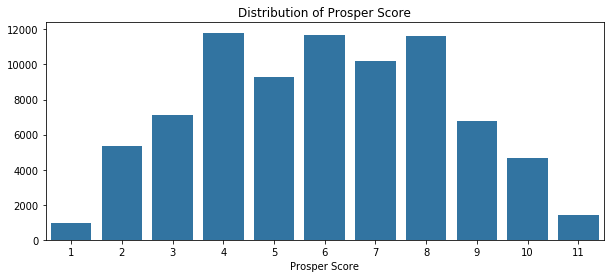

In [7]:
# set default colot
color = sns.color_palette()[0]
# int as Prosper Score values
labels = (range(1,12))

prosper_score = data['ProsperScore'].value_counts()

plt.figure(figsize=[10,4])
sns.barplot(prosper_score.index.values.astype(int), prosper_score, color=color)
plt.ylabel('')
plt.xlabel('Prosper Score')
plt.title('Distribution of Prosper Score');

## Distribution of Original Loan Amount

The origination amount of the loan ranges from 1000\\$ to 35000\\$, however, the positively skewed distribution suggests that lower amounts are priveleged over the higher amounts. 

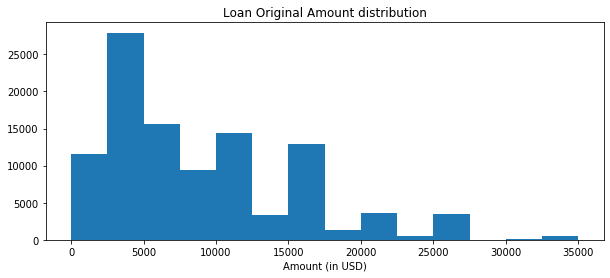

In [8]:
plt.figure(figsize=[10,4])

bins = np.arange(0, data['LoanOriginalAmount'].max()+2500, 2500)
plt.hist(data = data, x = "LoanOriginalAmount", bins = bins)
plt.xlabel('Amount (in USD)')
plt.title('Loan Original Amount distribution');

## Distribution of Employment Status

This data sets contains quite imbalanced classes: employed people (more than 65%) and full-time employed (26%) are the most represented. There are less then 1% of not employed and retired people.

In [9]:
employment_status_rel = data['EmploymentStatus'].value_counts(normalize=True)
employment_status_rel

Employed         0.656155
Full-time        0.257439
Self-employed    0.059845
Part-time        0.010632
Not employed     0.008160
Retired          0.007769
Name: EmploymentStatus, dtype: float64

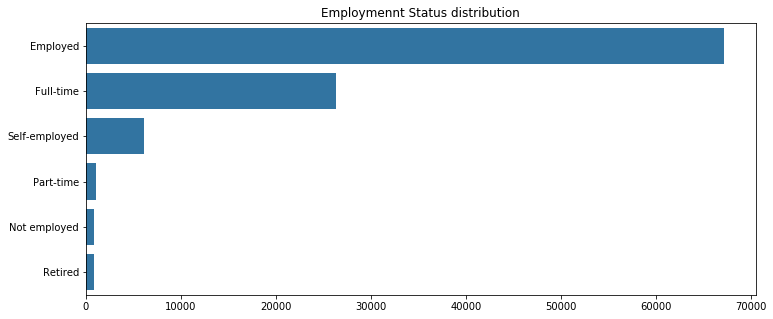

In [10]:
employment_status = data['EmploymentStatus'].value_counts()

plt.figure(figsize=[12,5])
sns.barplot(employment_status, employment_status.index.values, color=color)
#plt.ylabel('Employment Status')
plt.xlabel('')
plt.title('Employmennt Status distribution');

## Prosper Score & Loan Original Amount

Plotting the distribution of Prosper Score across Loan Original Amount produces and approximately linear relationship: the higher the risk, the lower the amount (for 1 risk score the mean amount is 4567\\$); and vice versa: low risks are associated wither higher loan amounts (for score 11 the mean loan amount equals 14872\\$). 

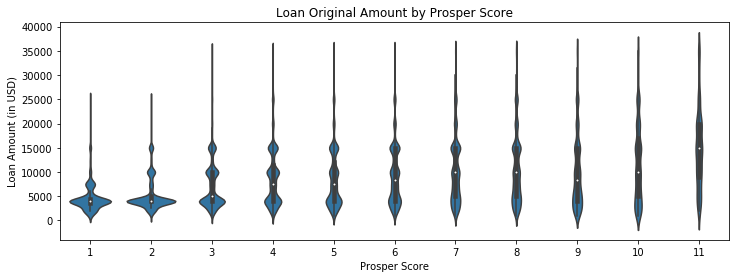

In [11]:
plt.figure(figsize=[12,4])
ax = sns.violinplot(data=data, x='ProsperScore', y='LoanOriginalAmount',color=color)
ax.set_xticklabels(labels)
plt.xlabel('Prosper Score')
plt.ylabel('Loan Amount (in USD)')
plt.title('Loan Original Amount by Prosper Score');

## Loan Original Amount & Employment Status

There is a corelation between Employment Status and Loan original amount. For instance not employed people, as well as part-time employed and not employed, tend to borrow low amounts (less than 5000\\$). On the contrary, whereas self-employed and employed people also privilege low amounts (around 500\\$) they also borrow amount around 10000\\$ and 15000\\$ very often.

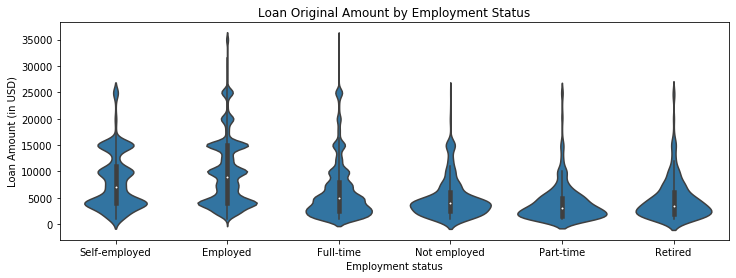

In [12]:
plt.figure(figsize=[12,4])
sns.violinplot(data=data, x='EmploymentStatus', y='LoanOriginalAmount',color=color)
plt.xlabel('Employment status')
plt.ylabel('Loan Amount (in USD)')
plt.title('Loan Original Amount by Employment Status');

## Employment Status & Prosper Score

Previously we saw that Prosper Score has a normal ditribution. The following fugure displays globally the same trend, however, there is more skewness encountered in some subgroups. Full-time employed people tend to take lower risks, the same trend is observed for part-time employed people. On the contrary, self-employed people - prefer higher risks. Not employed people are on the lower boundary of moderate Prosper Score, wich is closer to high risk scores.

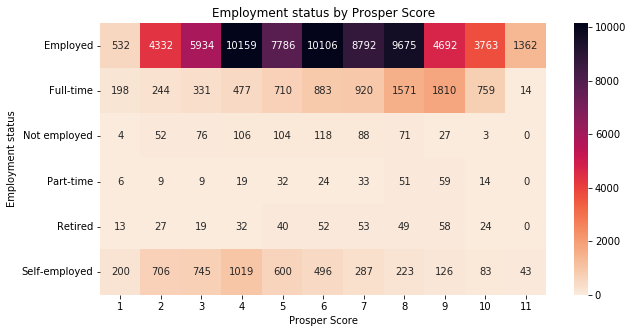

In [13]:
empl_prosp = data.groupby(['EmploymentStatus', 'ProsperScore']).size()
empl_prosp = empl_prosp.reset_index(name='count')
empl_prosp = empl_prosp.pivot(index = 'EmploymentStatus', columns = 'ProsperScore', values = 'count')

plt.figure(figsize=[10,5])
ax = sns.heatmap(empl_prosp, annot = True, fmt = 'd', cmap='rocket_r')
ax.set_xticklabels(labels)
plt.ylabel('Employment status')
plt.xlabel('Prosper Score')
plt.title('Employment status by Prosper Score');

## Prosper Score, Employment Status & Original Loan Amount

This prlot combines all the three variables of interest: Prosper Score, Employement Status and Loan Original Amount. We saw previously that the higher the Loan Amount - the lower is the risk. This plot allows to enter into details and to see how Employment Status is distributed withing each goup. 

First, we see that only self-employed, full-time employed and employed people borrow the highest amounts - with the lowest risk (score 11). Self employed people borrow higher amounts than all the other groups with the hiest rsik (score 1). 

In general, the amount of money borrowed by not employed and part-time employed people goes up till Prosper Score 8 and then drops for 9 and 10 score. As for employed people, the plot suggest a positive linear relationship between the loan amount and Prosper Score. There is not much variation in loan amount for retired people across different Prosper Scores. 

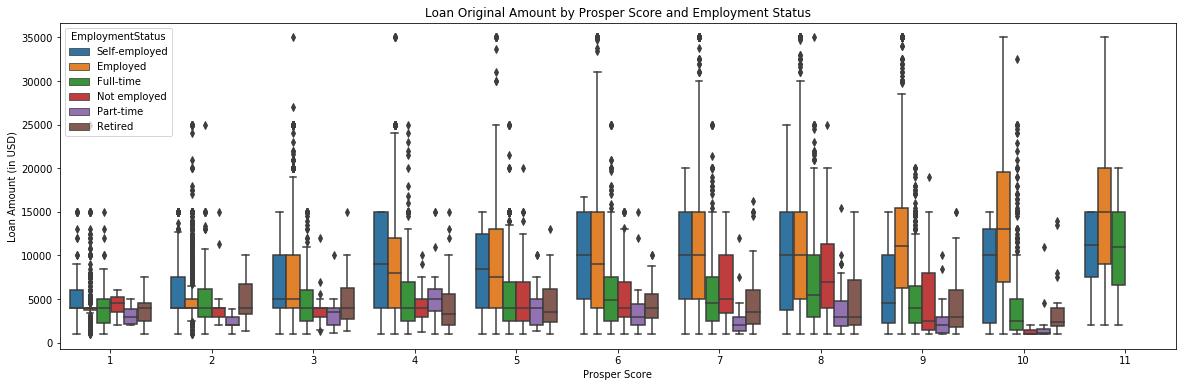

In [14]:
plt.figure(figsize=[20,6])
ax = sns.boxplot(data = data, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'EmploymentStatus')
ax.set_xticklabels(labels)
plt.xlabel('Prosper Score')
plt.ylabel('Loan Amount (in USD)')
plt.title('Loan Original Amount by Prosper Score and Employment Status');

In [ ]:
!jupyter nbconvert Part_II_Prosper_Loan.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_Prosper_Loan.ipynb to slides
[NbConvertApp] Writing 519266 bytes to Part_II_Prosper_Loan.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Prosper_Loan.slides.html
Use Control-C to stop this server
